In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

x1 = 25
x2 = 10
x3 = 55

df = df.with_columns([
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return'),
    pl.col('open').rolling_sum(x1).over('symbol').alias('open_sum')
])

df = df.with_columns([
    pl.col('return').rolling_sum(x2).over('symbol').alias('return_sum')
])

df = df.with_columns([
    (pl.col('return_sum') * pl.col('open_sum')).rank("dense").over('open_time').alias('first_term')
])

df = df.with_columns([
    (-1 * pl.col('first_term') - (pl.col('open_sum') * pl.col('return_sum')).shift(x3).over('symbol')).alias('alpha008_rank')
])


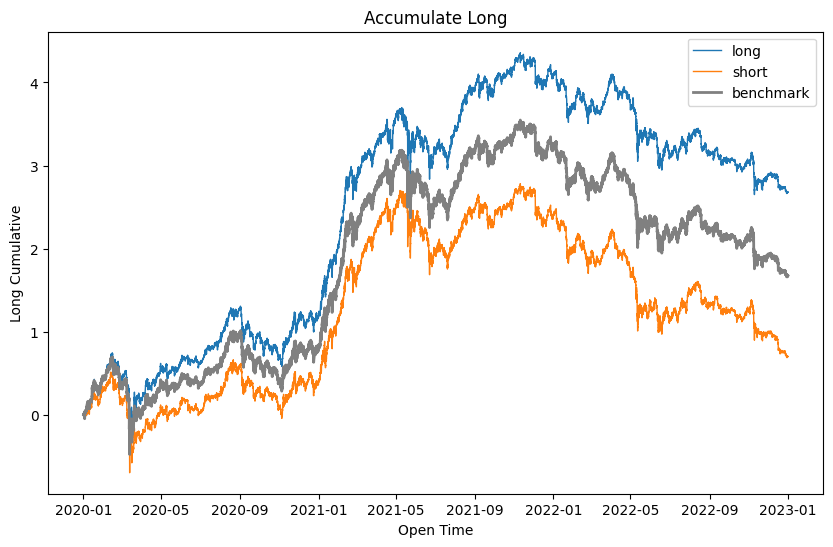

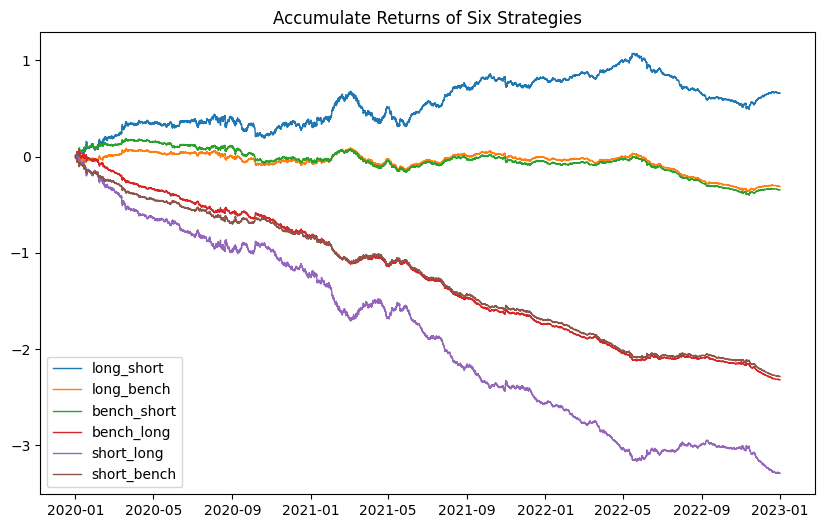

long: 
ann_return = 0.8922  sharpe = 0.819  maxdd = 0.633  calmar_ratio = 1.4095  

short: 
ann_return = 0.2342  sharpe = 0.2139  maxdd = 0.7976  calmar_ratio = 0.2936  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = 0.22  sharpe = 0.8055  maxdd = 0.2809  calmar_ratio = 0.7832  

long_bench: 
ann_return = -0.1033  sharpe = -0.709  maxdd = 0.418  calmar_ratio = -0.2472  

bench_long: 
ann_return = -0.7727  sharpe = -5.301  maxdd = 2.2287  calmar_ratio = -0.3467  

short_long: 
ann_return = -1.096  sharpe = -4.0133  maxdd = 3.2827  calmar_ratio = -0.3339  

short_bench: 
ann_return = -0.7613  sharpe = -5.1925  maxdd = 2.2384  calmar_ratio = -0.3401  

bench_short: 
ann_return = -0.1147  sharpe = -0.7822  maxdd = 0.4952  calmar_ratio = -0.2316  



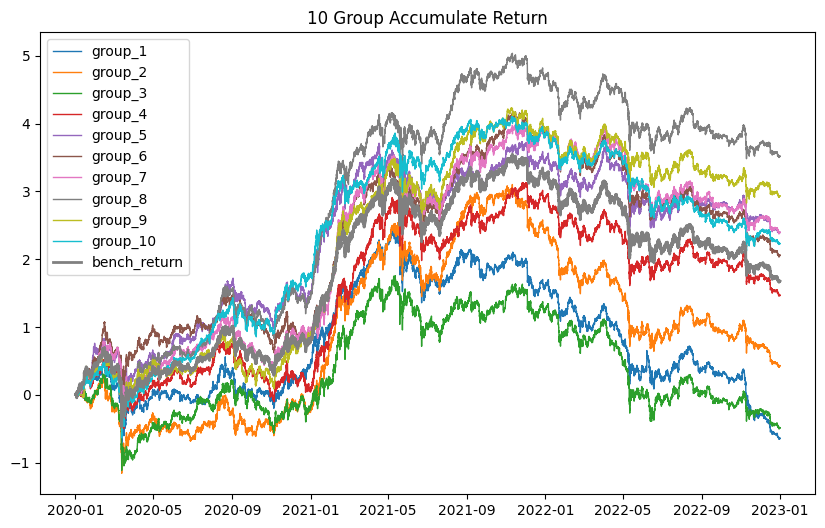

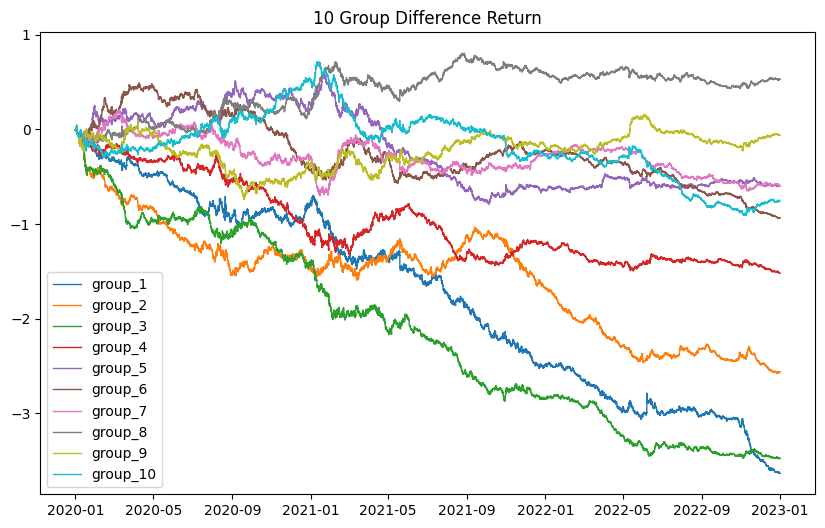

group_1: 
ann_return = -0.2149  sharpe = -0.1938  maxdd = 0.8991  calmar_ratio = -0.239  

group_2: 
ann_return = 0.142  sharpe = 0.1214  maxdd = 1.1259  calmar_ratio = 0.1261  

group_3: 
ann_return = -0.1617  sharpe = -0.1379  maxdd = 1.0855  calmar_ratio = -0.149  

group_4: 
ann_return = 0.4885  sharpe = 0.4231  maxdd = 0.6992  calmar_ratio = 0.6987  

group_5: 
ann_return = 0.7968  sharpe = 0.6912  maxdd = 0.5863  calmar_ratio = 1.359  

group_6: 
ann_return = 0.6849  sharpe = 0.5913  maxdd = 0.5646  calmar_ratio = 1.2131  

group_7: 
ann_return = 0.797  sharpe = 0.6855  maxdd = 0.5964  calmar_ratio = 1.3364  

group_8: 
ann_return = 1.1712  sharpe = 1.0216  maxdd = 0.6765  calmar_ratio = 1.7313  

group_9: 
ann_return = 0.976  sharpe = 0.867  maxdd = 0.7102  calmar_ratio = 1.3742  

group_10: 
ann_return = 0.7416  sharpe = 0.7049  maxdd = 0.7539  calmar_ratio = 0.9837  

-----------------------------------------
group_difference_1: 
ann_return = -1.2104  sharpe = -2.735  maxdd = 

In [2]:
factors = df.select(['open_time', 'symbol', 'alpha008_rank'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()